1. Intensity Transformation

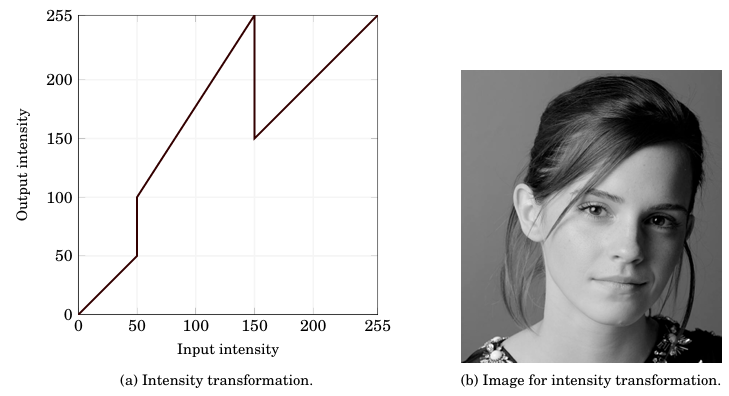

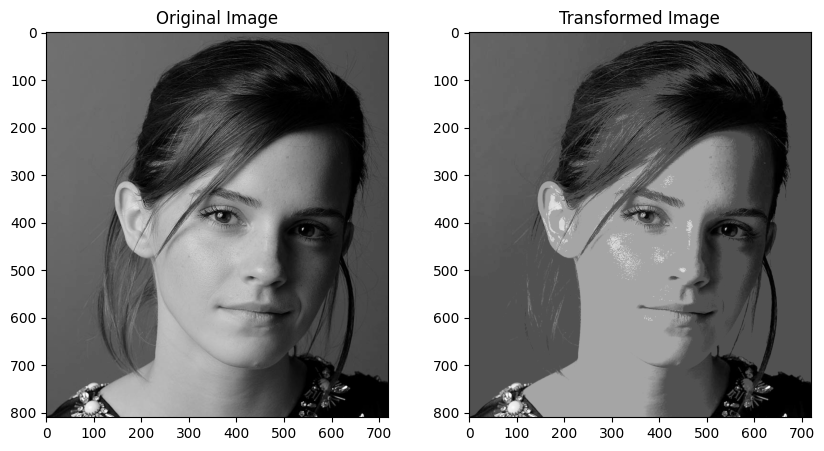

In [9]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('a1images\\emma.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None

# intensity transformation
def intensity_transform(pixel):
    if 0 <= pixel < 50:
        return int(2 * pixel)
    elif 50 <= pixel < 100:
        return int(100)
    elif 100 <= pixel < 150:
        return int(2 * pixel - 100)
    elif 150 <= pixel < 200:
        return int(200)
    elif 200 <= pixel <= 255:
        return int(55 + pixel)

# Vectorize the transformation function
vectorized_transform = np.vectorize(intensity_transform)

# Apply the transformation
transformed_image = vectorized_transform(img)

# Display the original and transformed images
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Original Image')
plt.imshow(img, cmap='gray')

plt.subplot(1,2,2)
plt.title('Transformed Image')
plt.imshow(transformed_image, cmap='gray')

plt.show()

